In [1]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
palette = {'all_kfold': 'tab:blue', 'ts': 'tab:orange', 'all_nested': 'tab:green', 'fs_nested_pt_kfold': 'tab:red', 'fs_kfold_pt_nested': 'tab:purple'}

In [3]:
path = os.getcwd()
data_files = glob.glob(os.path.join(path, "binary_cleveland/binary*"))

li = []
for filename in data_files:
    df = pd.read_csv(filename)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

new_names = dict([(i,'metric_'+ i) for i in df.iloc[0:1,9:].columns.values])
df.rename(columns=new_names, inplace=True)

df = df[df['metric_accuracy'].notna()]
df

,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,metric_accuracy,metric_balanced_accuracy,metric_f1,metric_precision,metric_recall
0,svm,accuracy,0.1,rfe,0.4,ts,0.6,NaN,2,0.750000,0.750000,0.748252,0.757143,0.750000
1,svm,accuracy,0.1,rfe,0.4,ts,0.6,NaN,2,0.416667,0.416667,0.412587,0.414286,0.416667
2,svm,accuracy,0.1,rfe,0.4,ts,0.6,NaN,2,0.583333,0.583333,0.555556,0.611111,0.583333
3,svm,accuracy,0.1,rfe,0.4,ts,0.6,NaN,2,0.500000,0.500000,0.485714,0.500000,0.500000
4,svm,accuracy,0.1,rfe,0.4,ts,0.6,NaN,2,0.750000,0.750000,0.748252,0.757143,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506821,logistic_regression,f1,1.0,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.838071,0.835983,0.836974,0.846937,0.838071
506822,logistic_regression,f1,1.0,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.831243,0.828904,0.829216,0.845845,0.831243
506823,logistic_regression,f1,1.0,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.835424,0.831720,0.834153,0.839564,0.835424
506824,logistic_regression,f1,1.0,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.831382,0.827277,0.830202,0.836791,0.831382


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506700 entries, 0 to 506825
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   model                     506700 non-null  object 
 1   main_metric               506700 non-null  object 
 2   sample_size               506700 non-null  float64
 3   feature_selector          506700 non-null  object 
 4   feature_selection_frac    506700 non-null  float64
 5   validation_type           506700 non-null  object 
 6   train_size                80100 non-null   float64
 7   cv_split_size             399600 non-null  float64
 8   par_split_size            506700 non-null  int64  
 9   metric_accuracy           506700 non-null  float64
 10  metric_balanced_accuracy  506700 non-null  float64
 11  metric_f1                 506700 non-null  float64
 12  metric_precision          506700 non-null  float64
 13  metric_recall             506700 non-null  f

In [5]:
data = df
data = data.reset_index()
pivoted_all = pd.wide_to_long(data, stubnames='metric', i='index', j='metric_type', sep='_', suffix=r'\w+')
pivoted_all.reset_index(inplace=True)
pivoted_all = pivoted_all.drop('index', axis=1)
pivoted_all.rename(columns={'metric': 'metric_measurement'}, inplace=True)
r = pivoted_all['sample_size'] * 303
pivoted_all['sample_size'] = r
pivoted_all

,metric_type,main_metric,model,sample_size,validation_type,cv_split_size,par_split_size,feature_selector,feature_selection_frac,train_size,metric_measurement
0,accuracy,accuracy,svm,30.3,ts,NaN,2,rfe,0.4,0.6,0.750000
1,accuracy,accuracy,svm,30.3,ts,NaN,2,rfe,0.4,0.6,0.416667
2,accuracy,accuracy,svm,30.3,ts,NaN,2,rfe,0.4,0.6,0.583333
3,accuracy,accuracy,svm,30.3,ts,NaN,2,rfe,0.4,0.6,0.500000
4,accuracy,accuracy,svm,30.3,ts,NaN,2,rfe,0.4,0.6,0.750000
...,...,...,...,...,...,...,...,...,...,...,...
2533495,recall,f1,logistic_regression,303.0,fs_kfold_pt_nested,13.0,13,rfe,1.0,NaN,0.838071
2533496,recall,f1,logistic_regression,303.0,fs_kfold_pt_nested,13.0,13,rfe,1.0,NaN,0.831243
2533497,recall,f1,logistic_regression,303.0,fs_kfold_pt_nested,13.0,13,rfe,1.0,NaN,0.835424
2533498,recall,f1,logistic_regression,303.0,fs_kfold_pt_nested,13.0,13,rfe,1.0,NaN,0.831382


Same metrics for varying, but reduced parameter split size OR varying feature selection frac for ts, kfold and nested; cv split size, trainsize fixed.

In [6]:
same_metrics = pivoted_all[pivoted_all['main_metric'] == pivoted_all['metric_type']]
same_metrics_fixed = same_metrics[((same_metrics['train_size'] == 0.8) | same_metrics['train_size'].isna())
    & ((same_metrics['cv_split_size'] == 13.0) | same_metrics['cv_split_size'].isna()) & ((same_metrics['par_split_size'] == 2.0) | (same_metrics['par_split_size'] == 7.0) | (same_metrics['par_split_size'] == 13.0)) & ((same_metrics['validation_type'] == 'ts') | (same_metrics['validation_type'] == 'all_nested') | (same_metrics['validation_type'] == 'all_kfold'))]

same_metrics_fixed_feature = same_metrics_fixed[same_metrics_fixed['feature_selection_frac'] == 1.0]
same_metrics_fixed_par = same_metrics_fixed[same_metrics_fixed['par_split_size'] == 13.0]

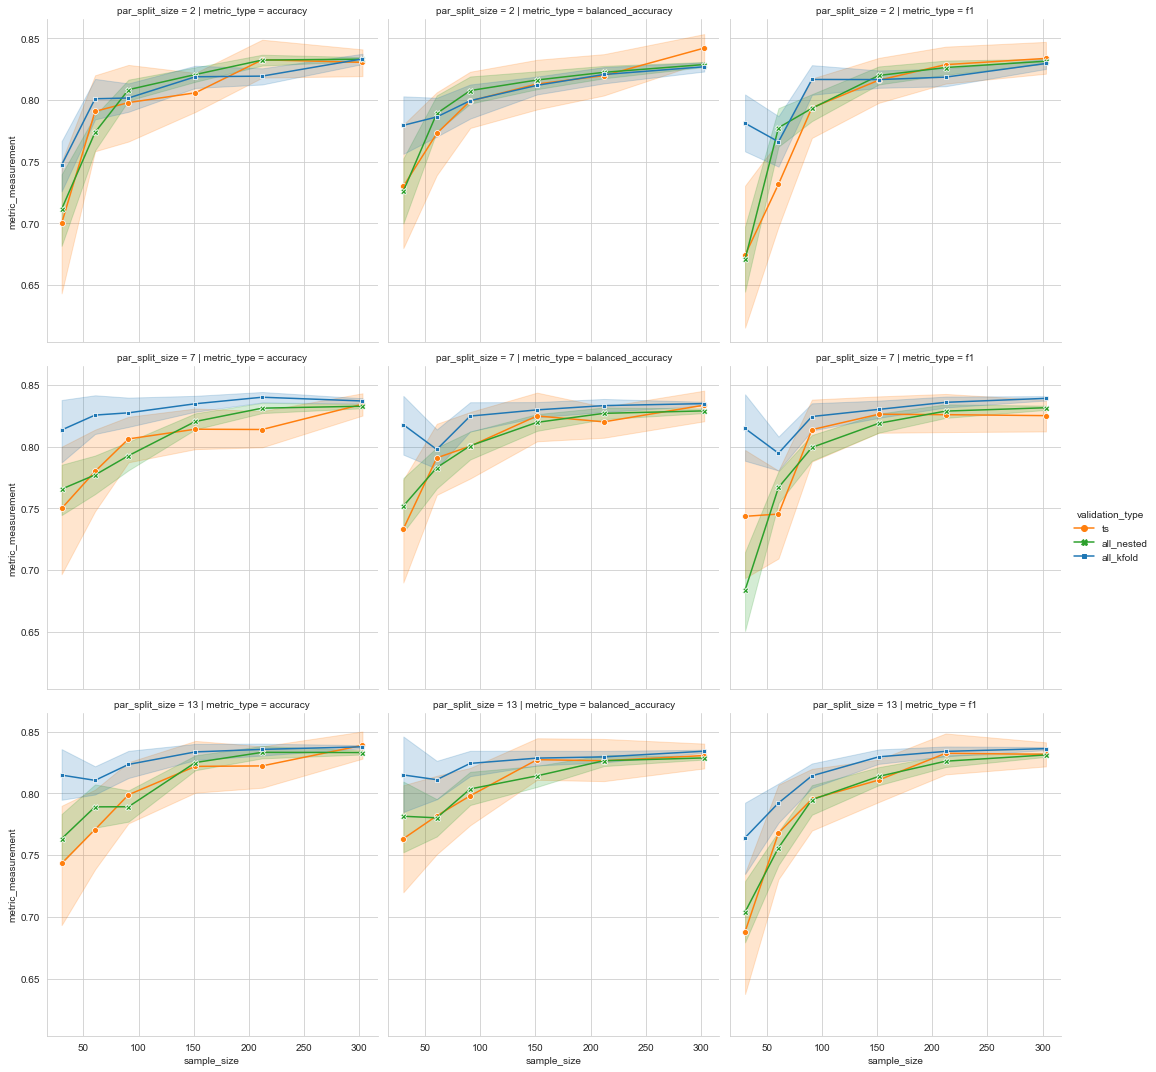

In [7]:
same_metrics_fixed_feature_lr = same_metrics_fixed_feature[same_metrics_fixed_feature['model'] == 'logistic_regression']
sns.relplot(x='sample_size', data=same_metrics_fixed_feature_lr, hue='validation_type', kind='line', y='metric_measurement', ci=95, row='par_split_size', col='metric_type', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

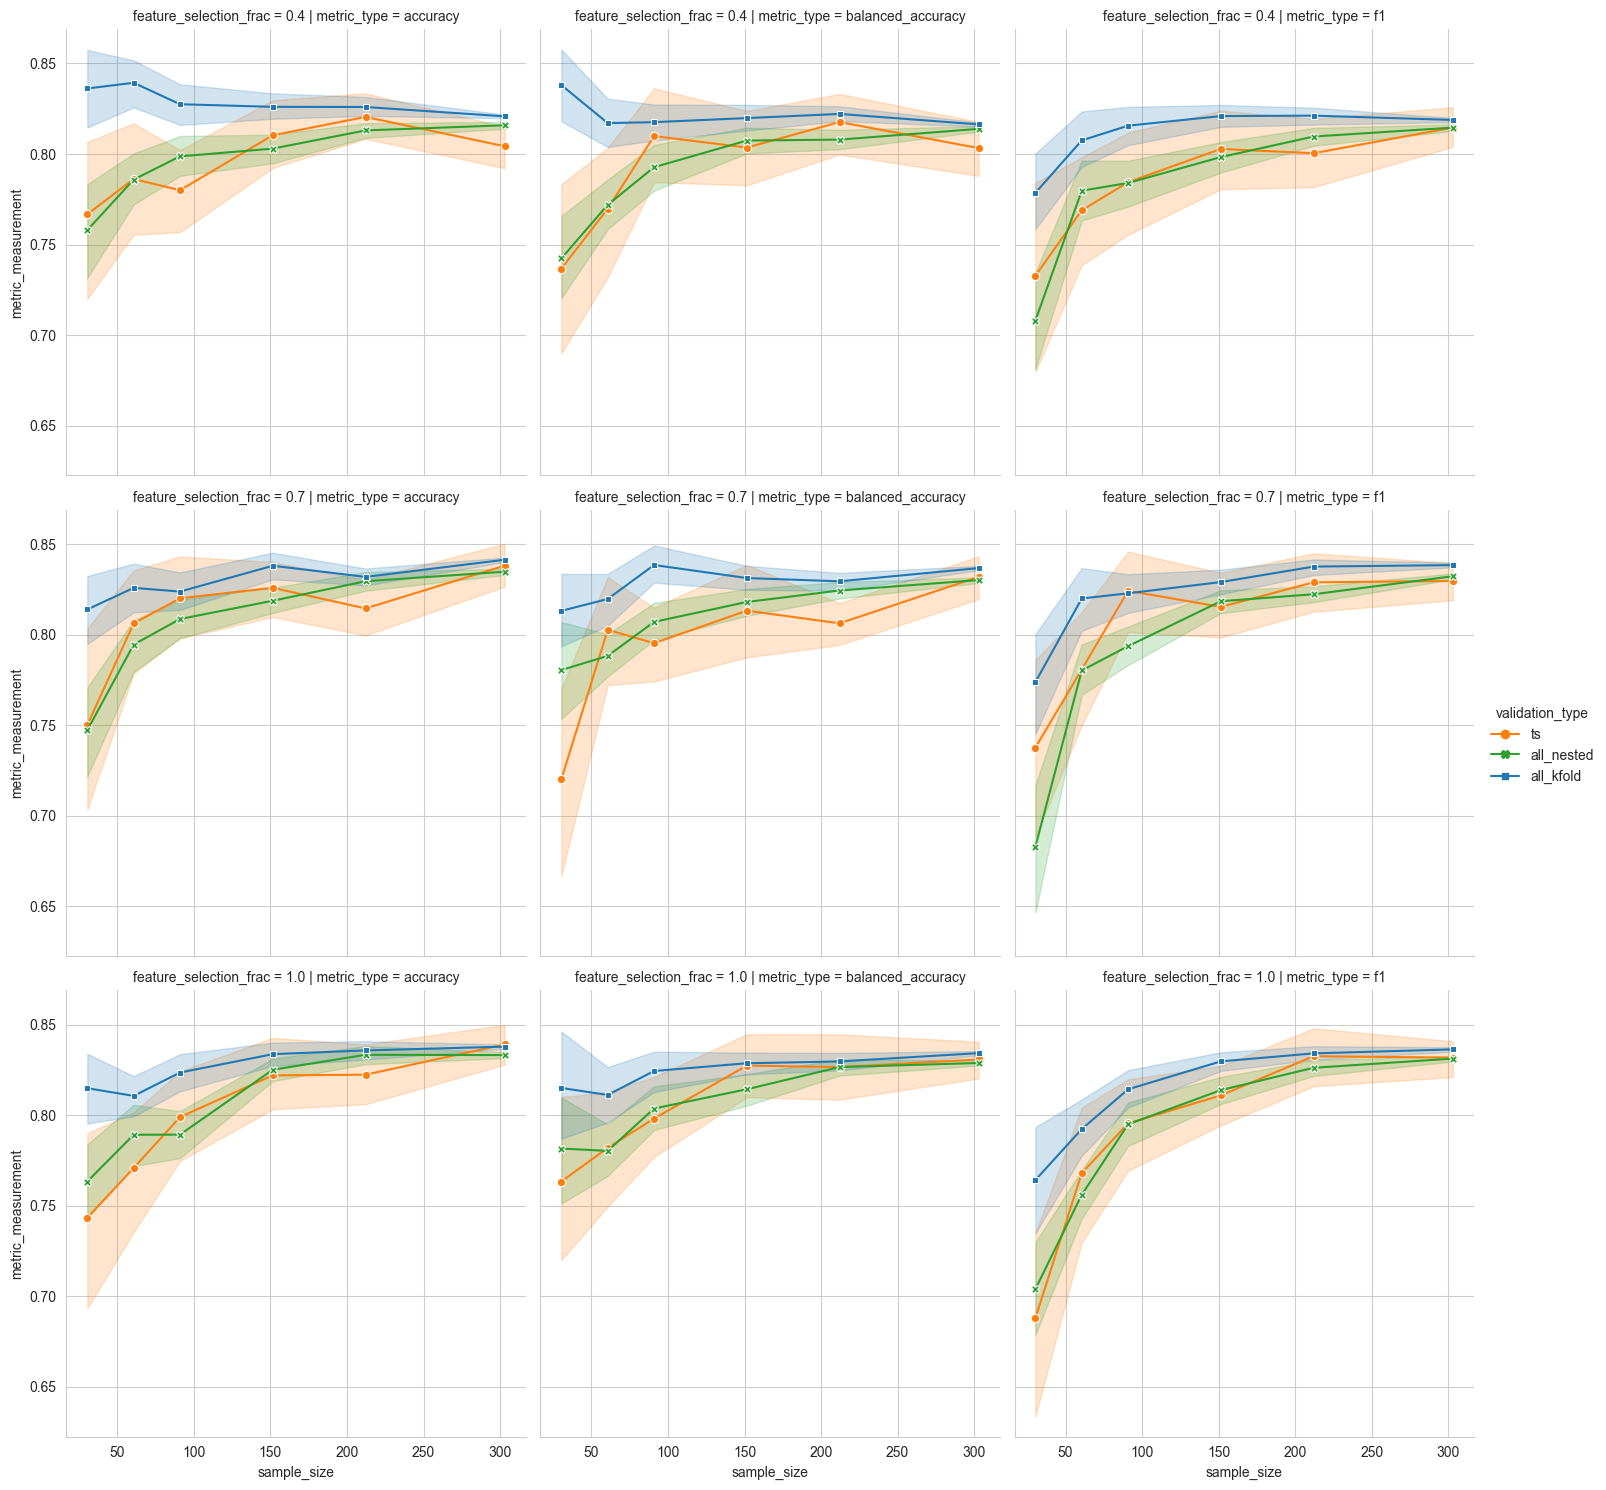

In [8]:
same_metrics_fixed_par_lr = same_metrics_fixed_par[same_metrics_fixed_par['model'] == 'logistic_regression']
sns.relplot(x='sample_size', data=same_metrics_fixed_par_lr, hue='validation_type', kind='line', y='metric_measurement', ci=95, row='feature_selection_frac', col='metric_type', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

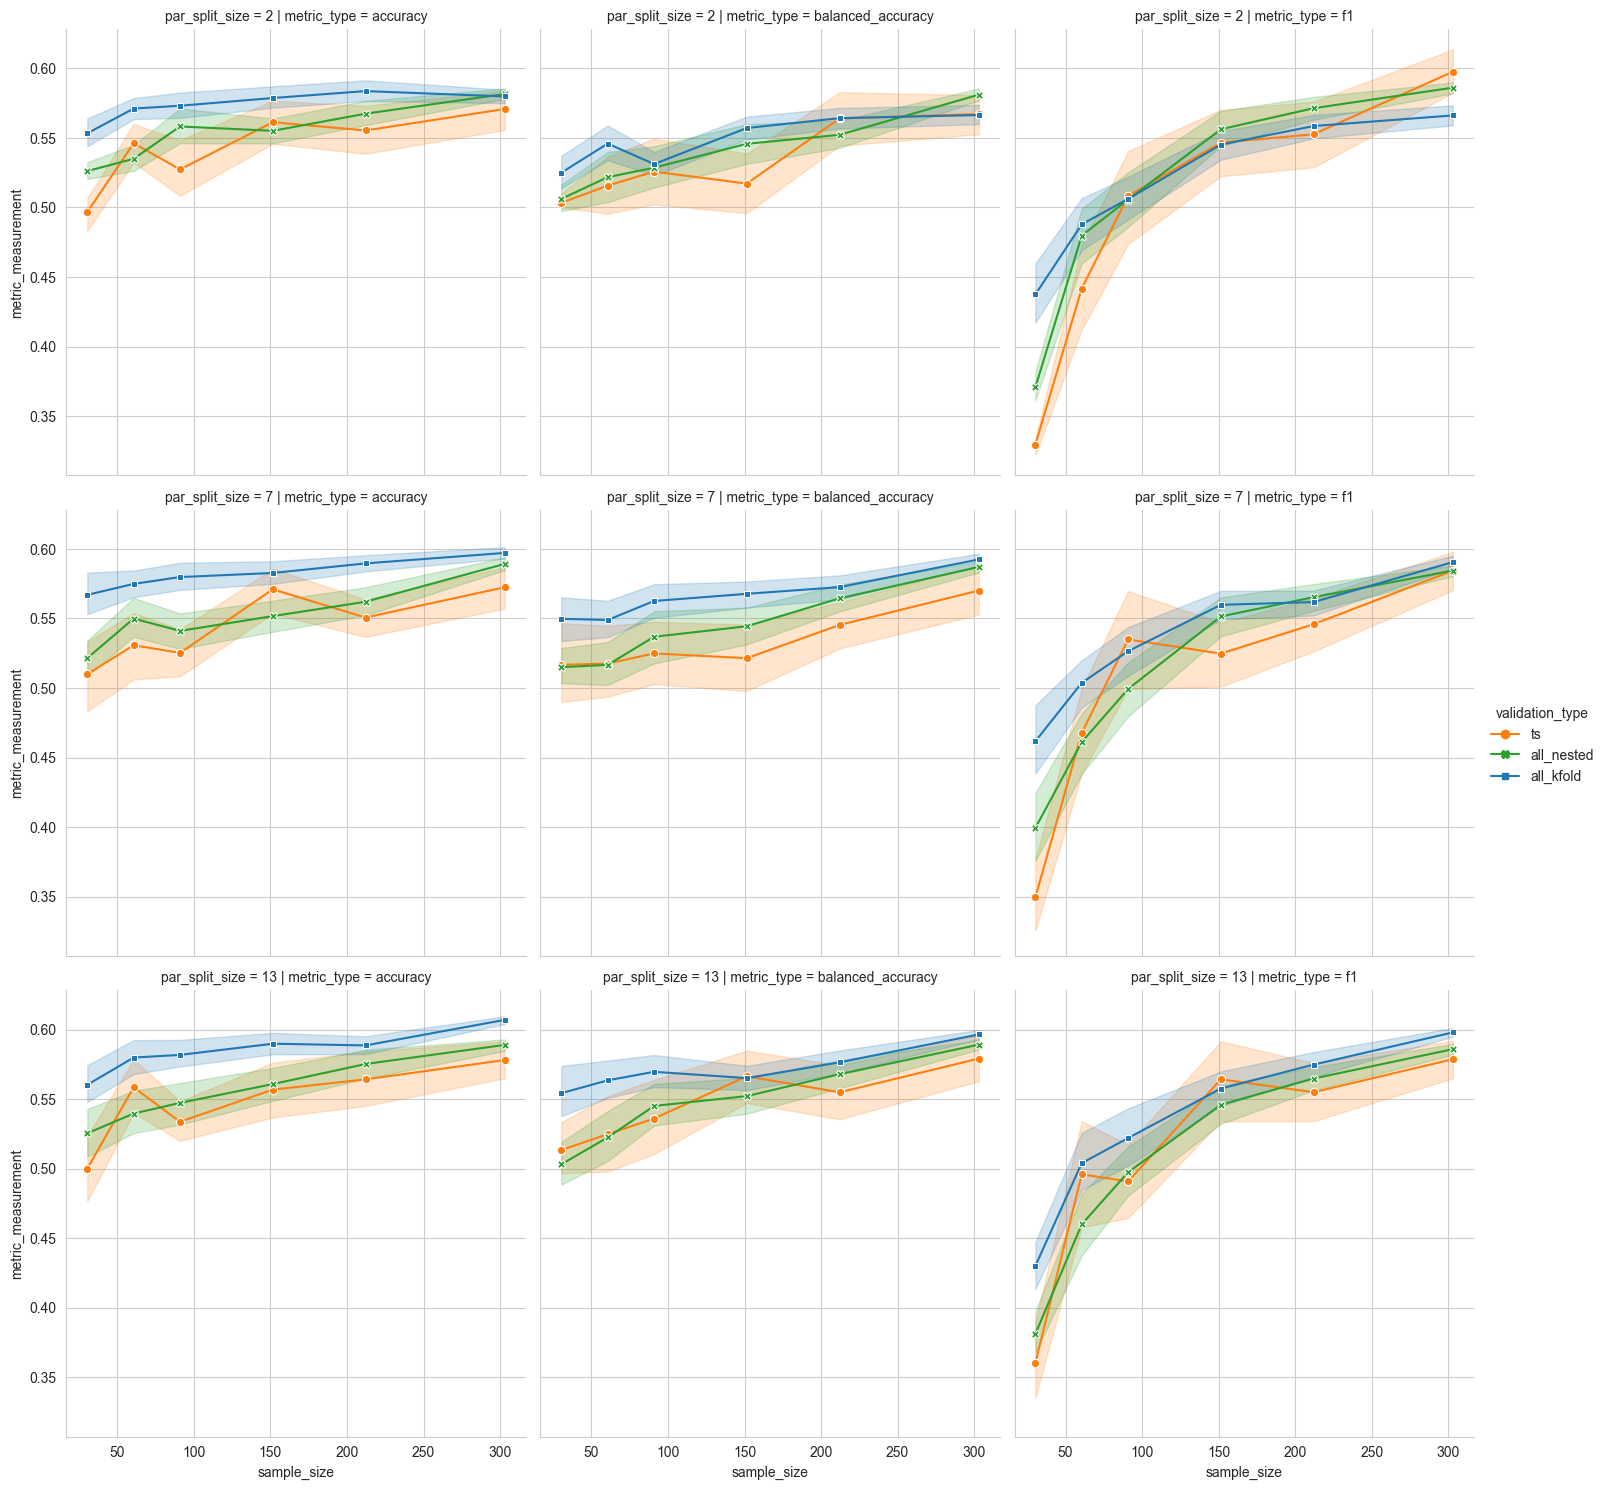

In [9]:
same_metrics_fixed_feature_svm = same_metrics_fixed_feature[same_metrics_fixed_feature['model'] == 'svm']
sns.relplot(x='sample_size', data=same_metrics_fixed_feature_svm, hue='validation_type', kind='line', y='metric_measurement', ci=95, row='par_split_size', col='metric_type', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

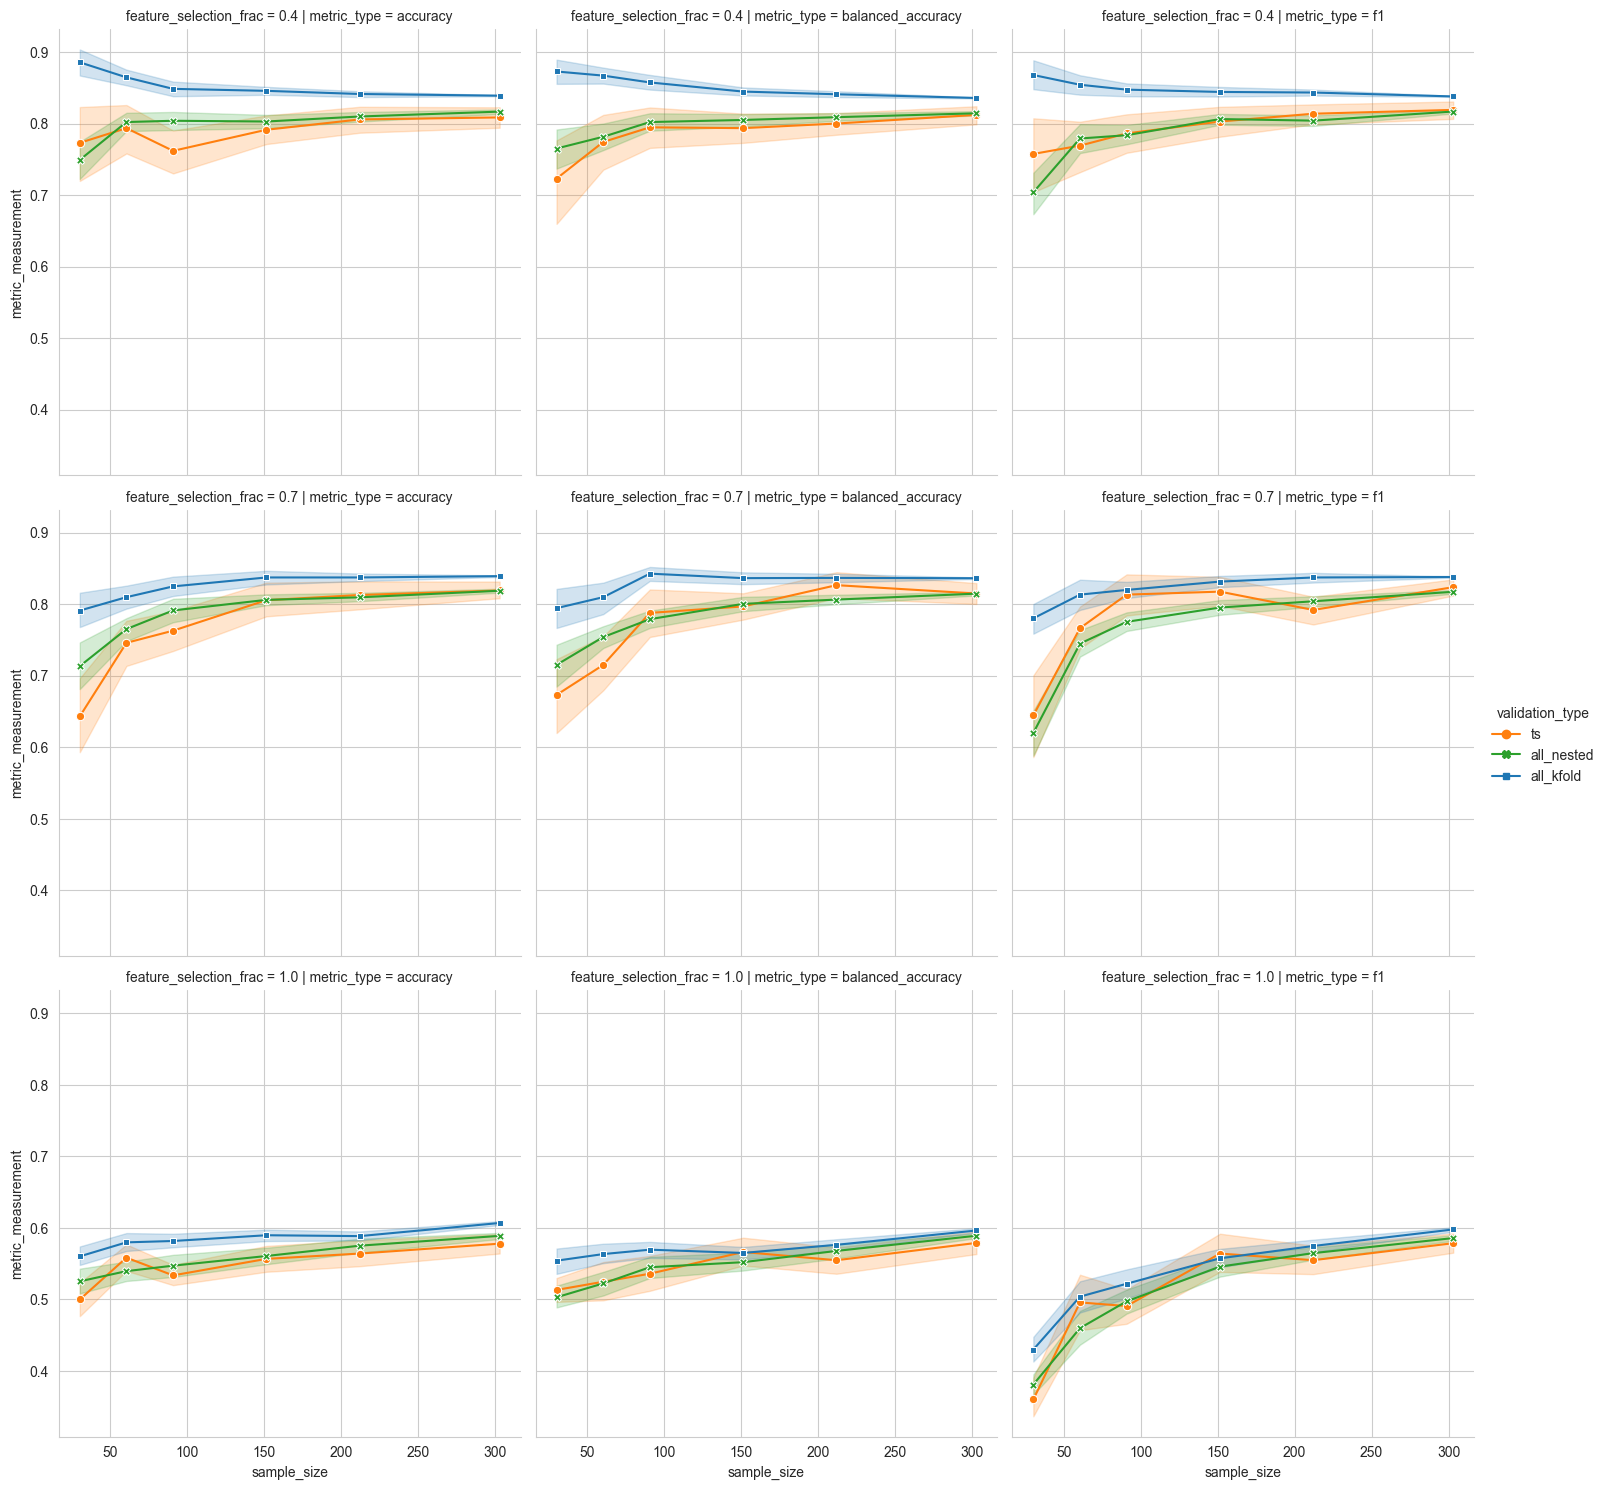

In [10]:
same_metrics_fixed_par_svm = same_metrics_fixed_par[same_metrics_fixed_par['model'] == 'svm']
sns.relplot(x='sample_size', data=same_metrics_fixed_par_svm, hue='validation_type', kind='line', y='metric_measurement', ci=95, row='feature_selection_frac', col='metric_type', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

Here starts another section... fixed train size, cv split size and metric only accuracy.

In [11]:
acc_par_and_feature = pivoted_all[(pivoted_all['main_metric'] == 'accuracy')
    & (pivoted_all['metric_type'] == 'accuracy')
    & ((pivoted_all['train_size'] == 0.8) | pivoted_all['train_size'].isna())
    & ((pivoted_all['cv_split_size'] == 13.0) | pivoted_all['cv_split_size'].isna())]

In [12]:
acc_par_and_feature_lr = acc_par_and_feature[acc_par_and_feature['model'] == 'logistic_regression']
acc_par_and_feature_lr

,metric_type,main_metric,model,sample_size,validation_type,cv_split_size,par_split_size,feature_selector,feature_selection_frac,train_size,metric_measurement
253400,accuracy,accuracy,logistic_regression,30.3,ts,NaN,2,rfe,0.4,0.8,0.500000
253401,accuracy,accuracy,logistic_regression,30.3,ts,NaN,2,rfe,0.4,0.8,0.833333
253402,accuracy,accuracy,logistic_regression,30.3,ts,NaN,2,rfe,0.4,0.8,0.833333
253403,accuracy,accuracy,logistic_regression,30.3,ts,NaN,2,rfe,0.4,0.8,0.666667
253404,accuracy,accuracy,logistic_regression,30.3,ts,NaN,2,rfe,0.4,0.8,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
337795,accuracy,accuracy,logistic_regression,303.0,fs_kfold_pt_nested,13.0,13,rfe,1.0,NaN,0.830964
337796,accuracy,accuracy,logistic_regression,303.0,fs_kfold_pt_nested,13.0,13,rfe,1.0,NaN,0.831800
337797,accuracy,accuracy,logistic_regression,303.0,fs_kfold_pt_nested,13.0,13,rfe,1.0,NaN,0.828456
337798,accuracy,accuracy,logistic_regression,303.0,fs_kfold_pt_nested,13.0,13,rfe,1.0,NaN,0.835006


In [13]:
accuracy_selection_lr_no_mix = acc_par_and_feature_lr[(acc_par_and_feature_lr['validation_type'] == 'ts') | (acc_par_and_feature_lr['validation_type'] == 'all_nested') | (acc_par_and_feature_lr['validation_type'] == 'all_kfold') ]
accuracy_selection_lr_no_mix_reduced = accuracy_selection_lr_no_mix[(accuracy_selection_lr_no_mix['par_split_size'] == 2.0) | (accuracy_selection_lr_no_mix['par_split_size'] == 7.0) | (accuracy_selection_lr_no_mix['par_split_size'] == 13.0)]

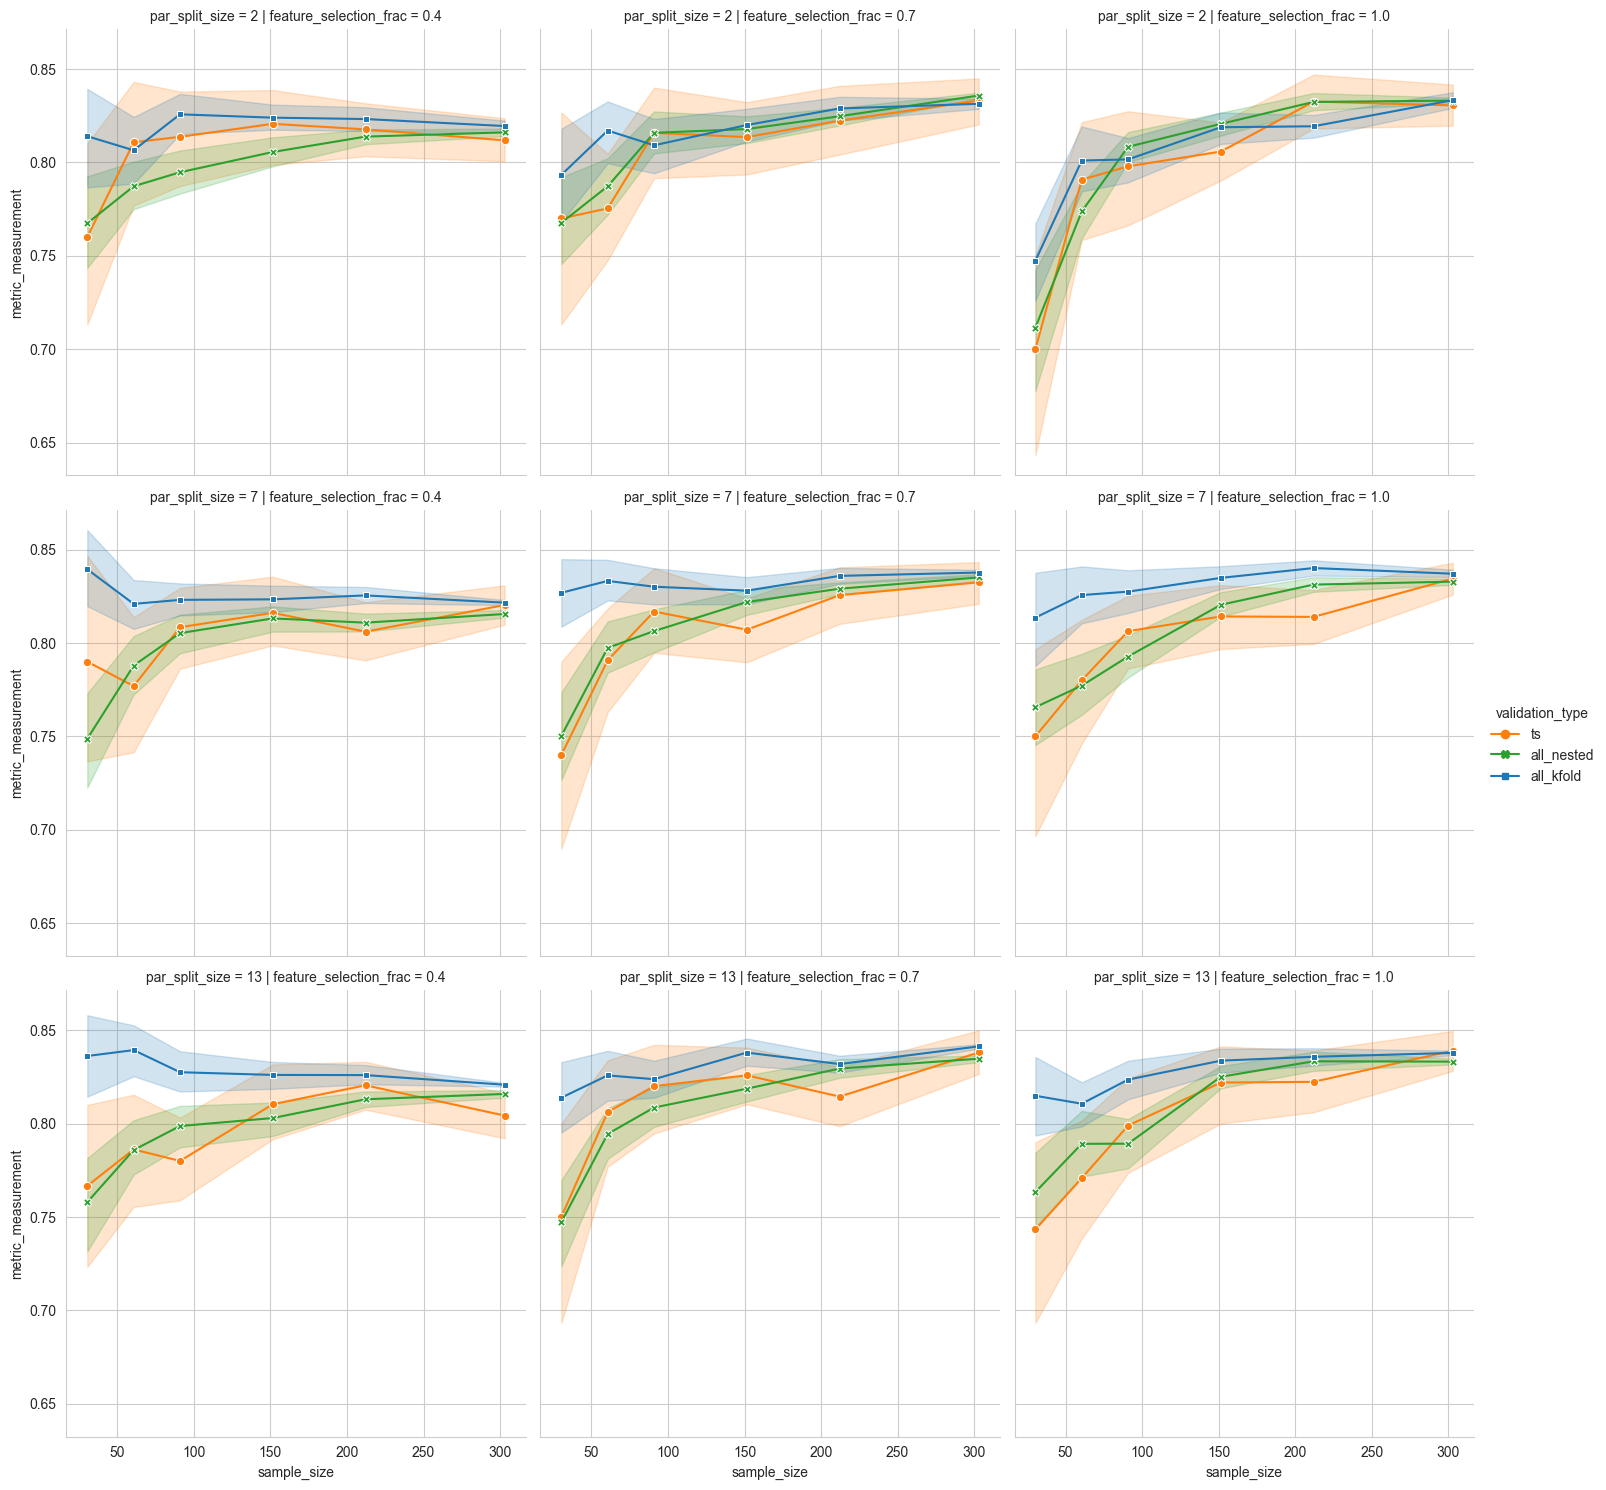

In [14]:
sns.relplot(x='sample_size', data=accuracy_selection_lr_no_mix_reduced, hue='validation_type', kind='line', y='metric_measurement', ci=95, row='par_split_size', col='feature_selection_frac', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

In [15]:
acc_par_and_feature_svm = acc_par_and_feature[acc_par_and_feature['model'] == 'svm']
acc_par_and_feature_svm

,metric_type,main_metric,model,sample_size,validation_type,cv_split_size,par_split_size,feature_selector,feature_selection_frac,train_size,metric_measurement
50,accuracy,accuracy,svm,30.3,ts,NaN,2,rfe,0.4,0.8,0.666667
51,accuracy,accuracy,svm,30.3,ts,NaN,2,rfe,0.4,0.8,0.833333
52,accuracy,accuracy,svm,30.3,ts,NaN,2,rfe,0.4,0.8,1.000000
53,accuracy,accuracy,svm,30.3,ts,NaN,2,rfe,0.4,0.8,1.000000
54,accuracy,accuracy,svm,30.3,ts,NaN,2,rfe,0.4,0.8,0.833333
...,...,...,...,...,...,...,...,...,...,...,...
84445,accuracy,accuracy,svm,303.0,fs_kfold_pt_nested,13.0,13,rfe,1.0,NaN,0.579710
84446,accuracy,accuracy,svm,303.0,fs_kfold_pt_nested,13.0,13,rfe,1.0,NaN,0.567865
84447,accuracy,accuracy,svm,303.0,fs_kfold_pt_nested,13.0,13,rfe,1.0,NaN,0.607302
84448,accuracy,accuracy,svm,303.0,fs_kfold_pt_nested,13.0,13,rfe,1.0,NaN,0.599777


In [16]:
accuracy_selection_svm_no_mix = acc_par_and_feature_svm[(acc_par_and_feature_svm['validation_type'] == 'ts') | (acc_par_and_feature_svm['validation_type'] == 'all_nested') | (acc_par_and_feature_svm['validation_type'] == 'all_kfold') ]
accuracy_selection_svm_no_mix_reduced = accuracy_selection_svm_no_mix[(accuracy_selection_svm_no_mix['par_split_size'] == 2.0) | (accuracy_selection_svm_no_mix['par_split_size'] == 7.0) | (accuracy_selection_svm_no_mix['par_split_size'] == 13.0)]
accuracy_selection_svm_no_mix_reduced

,metric_type,main_metric,model,sample_size,validation_type,cv_split_size,par_split_size,feature_selector,feature_selection_frac,train_size,metric_measurement
50,accuracy,accuracy,svm,30.3,ts,NaN,2,rfe,0.4,0.8,0.666667
51,accuracy,accuracy,svm,30.3,ts,NaN,2,rfe,0.4,0.8,0.833333
52,accuracy,accuracy,svm,30.3,ts,NaN,2,rfe,0.4,0.8,1.000000
53,accuracy,accuracy,svm,30.3,ts,NaN,2,rfe,0.4,0.8,1.000000
54,accuracy,accuracy,svm,30.3,ts,NaN,2,rfe,0.4,0.8,0.833333
...,...,...,...,...,...,...,...,...,...,...,...
81945,accuracy,accuracy,svm,303.0,all_kfold,NaN,13,rfe,1.0,NaN,0.601031
81946,accuracy,accuracy,svm,303.0,all_kfold,NaN,13,rfe,1.0,NaN,0.593924
81947,accuracy,accuracy,svm,303.0,all_kfold,NaN,13,rfe,1.0,NaN,0.600056
81948,accuracy,accuracy,svm,303.0,all_kfold,NaN,13,rfe,1.0,NaN,0.596990


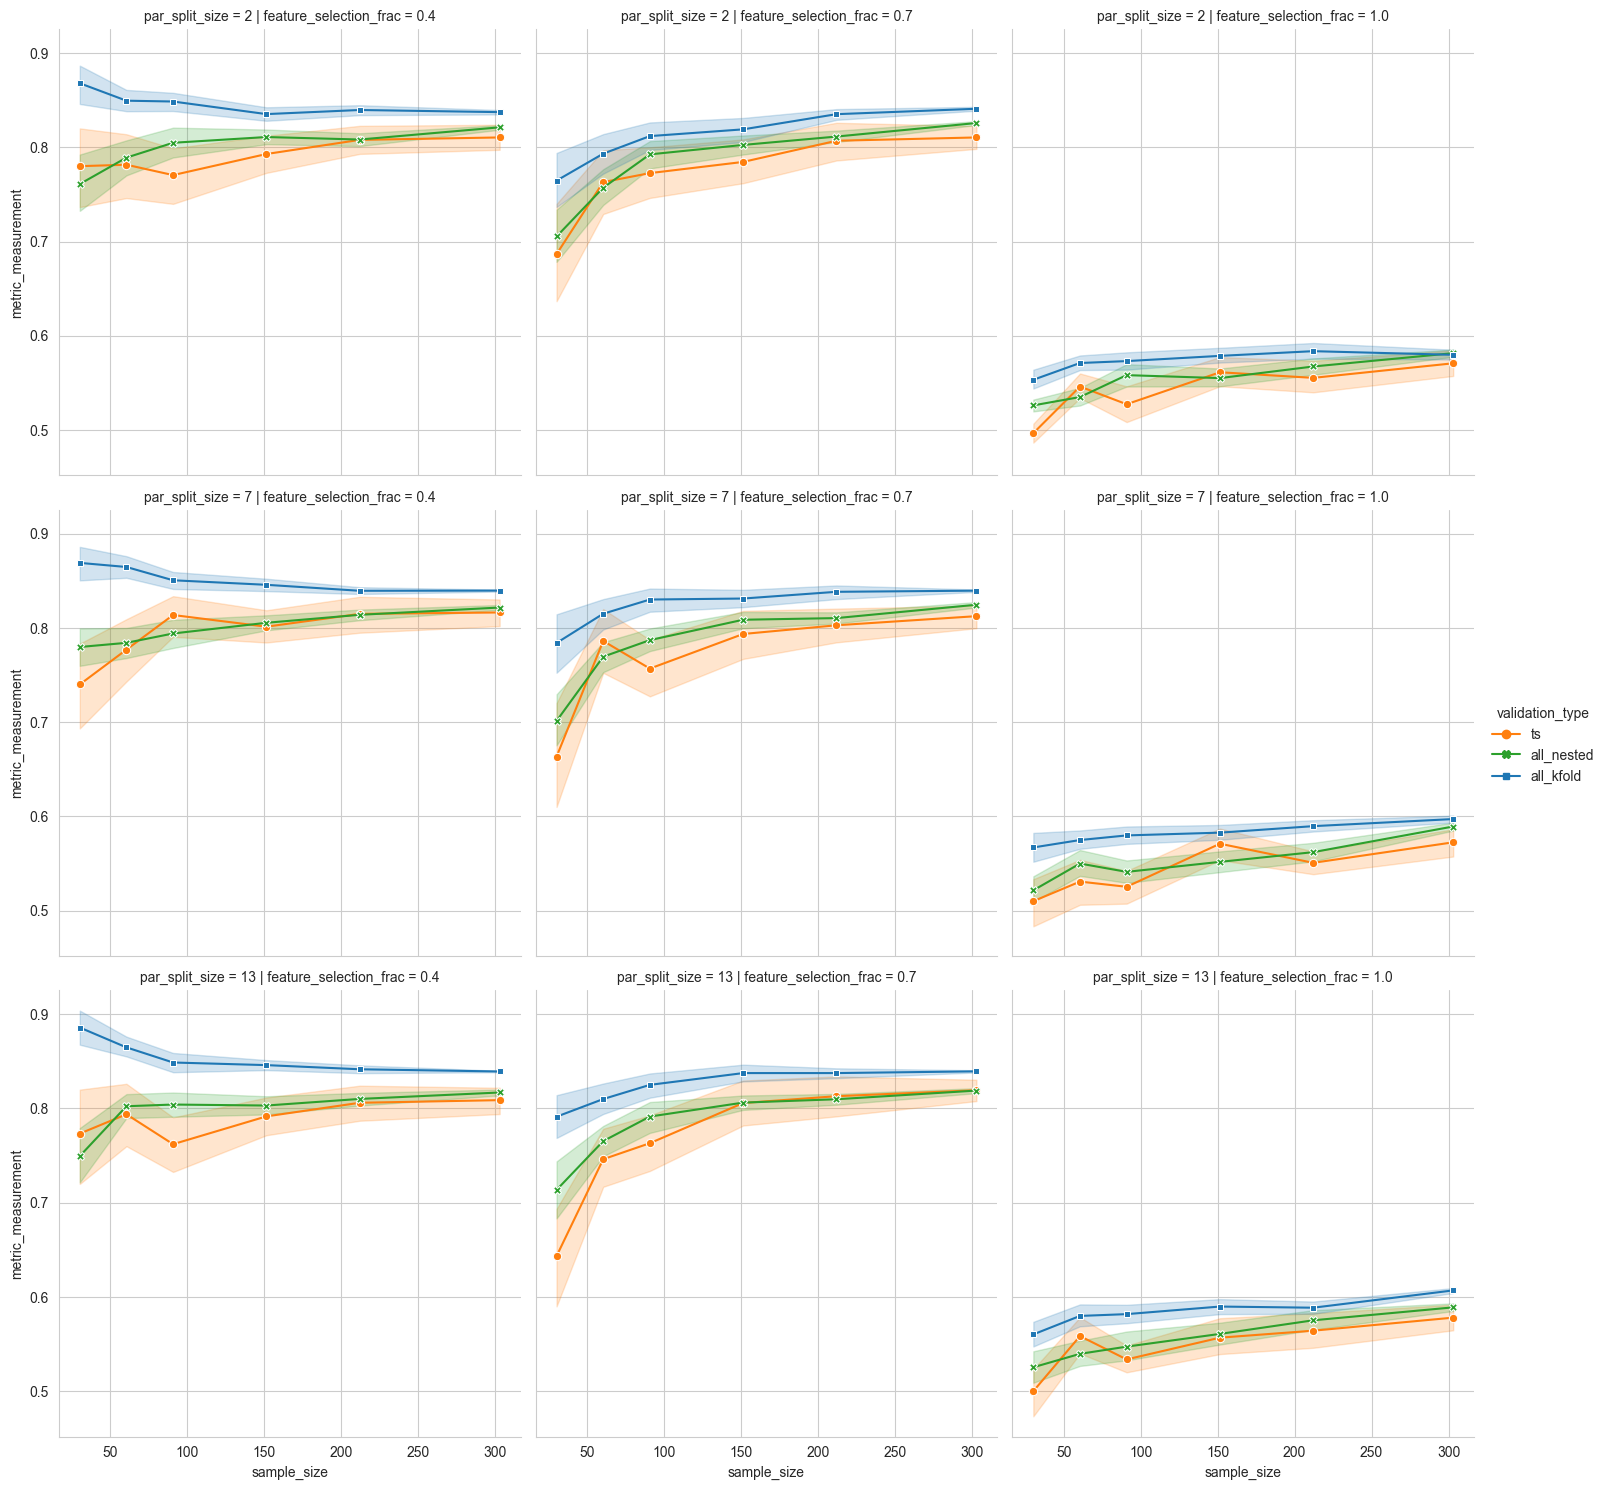

In [17]:
sns.relplot(x='sample_size', data=accuracy_selection_svm_no_mix_reduced, hue='validation_type', kind='line', y='metric_measurement', col='feature_selection_frac', ci=95, row='par_split_size', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

Now train size in train test split for svm and lr

In [18]:
acc_train_size = pivoted_all[(pivoted_all['main_metric'] == 'accuracy')
    & (pivoted_all['metric_type'] == 'accuracy')
    & (pivoted_all['validation_type'] == 'ts')
    & (pivoted_all['par_split_size'] == 13.0)
    & (pivoted_all['feature_selection_frac'] == 0.7)]

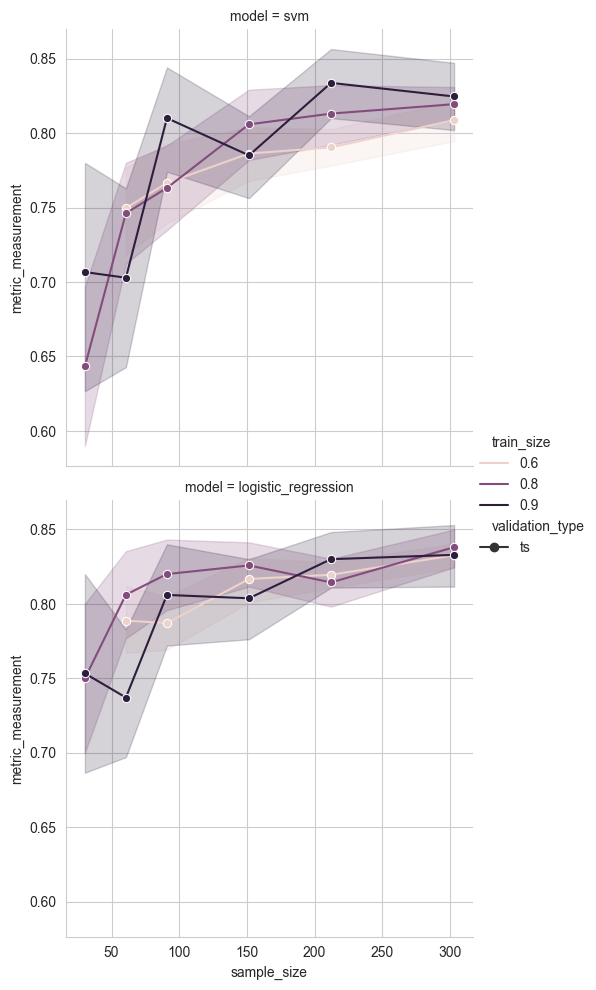

In [19]:
sns.relplot(x='sample_size', data=acc_train_size, kind='line', y='metric_measurement', hue='train_size', ci=95, row='model',  style='validation_type', markers=True, dashes=False)
plt.show()

Now varying cv split size for nested

In [20]:
acc_cv_split_size = pivoted_all[(pivoted_all['main_metric'] == 'accuracy')
    & (pivoted_all['metric_type'] == 'accuracy')
    & (pivoted_all['validation_type'] == 'all_nested')
    & ((pivoted_all['cv_split_size'] == 2.0) | (pivoted_all['cv_split_size'] == 7.0) | (pivoted_all['cv_split_size'] == 13.0))
    & (pivoted_all['par_split_size'] == 13.0)
    & (pivoted_all['feature_selection_frac'] == 0.7)]

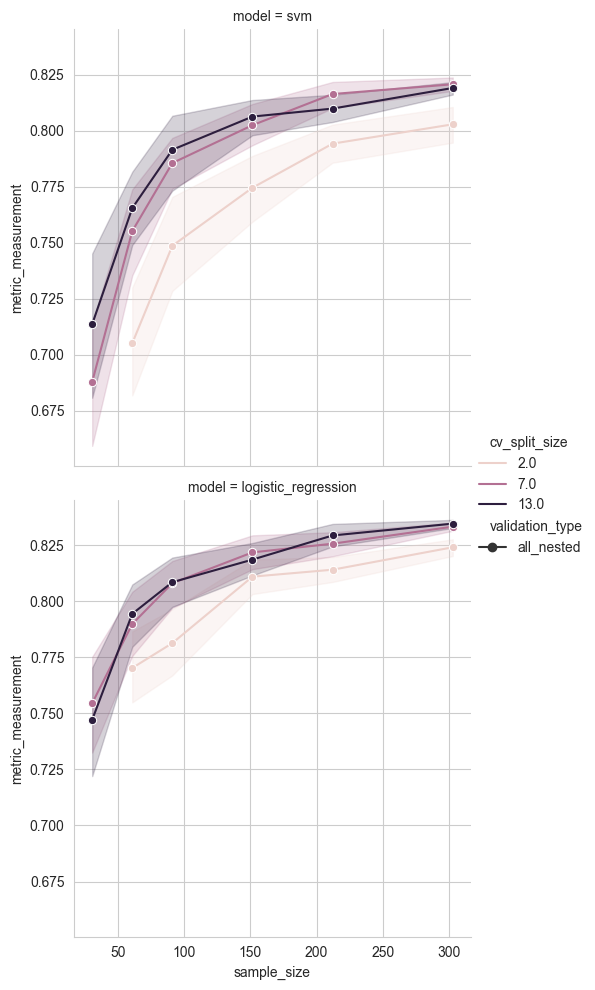

In [21]:
sns.relplot(x='sample_size', data=acc_cv_split_size, hue='cv_split_size', kind='line', y='metric_measurement', ci=95, row='model', style='validation_type', markers=True, dashes=False)
plt.show()